<p>O objetivo desse trabalho é analisar os dados coletados de um dos questionários realizados pela National Bureau of Statistics (NBS)
para avaliar o impacto do Covid19 na vida de moradores da Nigéria.</p>

<p>Para isso primeiro devemos importar duas planilhas como dataframes da biblioteca pandas do Python, elas contém as respostas à diferentes perguntas feitas pelo entrevistador ao entrevistado.<p>

In [ ]:
import pandas as pd
from scipy.stats import entropy 
import matplotlib.pyplot as plt
import seaborn as sns

dataset1 = pd.read_csv("/dataset1.csv")

print(dataset1.head())

            zone    state                 lga    sector   ea   hhid  \
0  4. South East  1. Abia  115. UMUAHIA NORTH  1. Urban  670  10001   
1  4. South East  1. Abia  115. UMUAHIA NORTH  1. Urban  670  10001   
2  4. South East  1. Abia  115. UMUAHIA NORTH  1. Urban  670  10001   
3  4. South East  1. Abia  115. UMUAHIA NORTH  1. Urban  670  10001   
4  4. South East  1. Abia  115. UMUAHIA NORTH  1. Urban  670  10001   

                                       source_cd source_cd_os    s7q1  \
0     1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING          NaN  1. YES   
1                    2. NON-FARM FAMILY BUSINESS          NaN  1. YES   
2        3. WAGE EMPLOYMENT OF HOUSEHOLD MEMBERS          NaN  1. YES   
3                     4. REMITTANCES FROM ABROAD          NaN   2. NO   
4  5. REMITTANCES FROM FAMILY WITHIN THE COUNTRY          NaN   2. NO   

                 s7q2  
0  2. Stayed the same  
1          3. Reduced  
2  2. Stayed the same  
3                 NaN  
4             

<p>Essa primeira planilha tem 10 colunas, a coluna "ea" e "hhid" identificam a entrevista e os entrevistado, então é necessário excluirmos essas colunas para preservar a privacidade dos mesmos.</p>

<p>A coluna "source_cd_os" é uma especificação da coluna "source_cd" e como só possui um registro, não é relevante estatisticamente para essa análise.</p>

<p>As colunas mais importantes dessa planilha para a análise que queremos fazer são as colunas "zone","sector" e "source_cd". A coluna "zone" especifica a região da Nigéria em que o entrevistado mora, a coluna "sector" mostra se a pessoa mora na zona rural ou urbana e a coluna "source_cd" indica a principal fonte de renda familiar do indivíduo na pandemia.</p>

<p>Iremos manter essas 3 colunas e excluir todas as outras.</p>



In [ ]:
dataset2 = pd.read_csv("/dataset2.csv")

print(dataset2.head())

            zone    state                  lga    sector    ea   hhid  \
0  4. South East  1. Abia   115. UMUAHIA NORTH  1. Urban   670  10001   
1  4. South East  1. Abia   115. UMUAHIA NORTH  1. Urban   670  10003   
2  4. South East  1. Abia         105. IKWUANO  2. Rural     0  10009   
3  4. South East  1. Abia   115. UMUAHIA NORTH  1. Urban   670  10010   
4  4. South East  1. Abia  111. OSISIOMA NORTH  1. Urban  1146  10034   

   interviewer_id             wt_baseline    s3q1 s3q2__1  ... s12q4__0  \
0               2  30.902.154.632.391.800  1. YES  1. YES  ...      0.0   
1               6   2.739.143.837.376.990  1. YES  1. YES  ...      0.0   
2              20   2.842.163.926.521.340  1. YES  1. YES  ...      0.0   
3              14                     NaN     NaN     NaN  ...      NaN   
4              15   8.231.460.285.510.360  1. YES  1. YES  ...      1.0   

  s12q4__1 s12q4__2 s12q4__3                s12q5 s12q9      s12q10 s12q10_os  \
0      0.0      0.0      1.0 

<p>Essa segunda planilha possui respostas para diversas perguntas das entrevistas, totalizando 194 colunas, as pessoas entrevistadas são as mesmas da planilha vista anteriormente.</p>
<p>De todas essas colunas as mais importantes são "s8q4","s8q6" e "s8q8". Essas colunas se referem respectivamente ás respostas das perguntas "Você, ou qualquer outro adulto em sua família, teve que pular uma refeição porque não tinha dinheiro suficiente ou outros recursos para conseguir comida?","Sua casa ficou sem comida nenhuma por falta de dinheiro ou outros recursos?" e "Você, ou qualquer outro adulto em sua casa, ficou sem comer por um dia inteiro por falta de dinheiro ou outros recursos?".</p>
<p>Utilizaremos essas colunas para descobrir se há uma relação entre a Segurança Alimentar na Pandemia, as regiões onde essas pessoas entrevistadas moram e a forma de subsistência dessas famílias.</p>

In [ ]:
print(dataset1.columns)

Index(['zone', 'state', 'lga', 'sector', 'ea', 'hhid', 'source_cd',
       'source_cd_os', 's7q1', 's7q2'],
      dtype='object')


Por meio do comando drop é possível apagar essas colunas que não vamos usar do dataset1.

In [ ]:
dataset1.drop(columns=['state','lga','ea','hhid','source_cd_os','s7q1','s7q2'],axis=1, inplace=True)
print(dataset1.columns)

Index(['zone', 'sector', 'source_cd', 's7q1', 's7q2'], dtype='object')


Por meio do comando drop é possível apagar essas colunas que não vamos usar do dataset2.

In [ ]:
dataset2.drop(columns=['state','lga','ea','hhid','interviewer_id','wt_baseline','s3q1','s3q2__1','s3q2__2','s3q2__3','s3q2__4','s3q2__5','s3q2__6','s3q2__7','s3q2__8','s3q2__9','s3q2__10','s3q3__2','s3q3__3','s3q3__4','s3q3__5','s3q3__6','s3q3__7','s3q3__8','s3q3__9','s3q3__10','s3q3__96','s3q3__11','s3q3__98','s3q3_os','s3q4','s3q5__1','s3q5__2','s3q5__3','s3q5__4','s3q5__5','s3q5__6','s3q5__96','s3q5_os','s4q1','s4q2','s4q3','s4q4','s5q1a1','s5q1b1','s5q1c1__1','s5q1c1__2','s5q1c1__3','s5q1c1__4','s5q1c1__5','s5q1c1__6','s5q1a2','s5q1b2','s5q1c2__1','s5q1c2__2','s5q1c2__3','s5q1c2__4','s5q1c2__5','s5q1c2__6','s5q1a3','s5q1b3','s5q1c3__1','s5q1c3__2','s5q1c3__3','s5q1c3__4','s5q1c3__5','s5q1c3__6','s5q1a4','s5q1b4','s5q1c4__1','s5q1c4__2','s5q1c4__3','s5q1c4__4','s5q1c4__5','s5q1c4__6','s5q1a5','s5q1b5','s5q1c5__1','s5q1c5__2','s5q1c5__3','s5q1c5__4','s5q1c5__5','s5q1c5__6','s5q1a6','s5q1b6','s5q1c6__1','s5q1c6__2','s5q1c6__3','s5q1c6__4','s5q1c6__5','s5q1c6__6','s5q1a7','s5q1b7','s5q1c7__1','s5q1c7__2','s5q1c7__3','s5q1c7__4','s5q1c7__5','s5q1c7__6','s5q1a8','s5q1b8','s5q1c8__1','s5q1c8__2','s5q1c8__3','s5q1c8__4','s5q1c8__5','s5q1c8__6','s5q2','s5q3','s5q4','s5q4_os','filter1','s5q4a','s5q4b','s5q5__1','s5q5__2','s5q5__3','s5q5__4','s5q5__5','s5q5__6','s5q5__7','s5q5__96','s5q5_os','s5q6','s5q7__1','s5q7__2','s5q7__3','s5q7__4','s5q7__5','s5q7__6','s5q7__7','s5q8','s5q9','s5q10','s5q10_os','s6q1','s6q2','s6q3','s6q3_os','s6q4','s6q5','s6q6','s6q7','s6q8','s6q8a','s6q8a_os','s6q9','s6q10_1','s6q10_2','s6q10_3','s6q10_4','s6q10_5','s6q10_6','s6q11','s6q12','s6q13','s6q14','s6q14_os','s6q15','s6q16','s6q17__1','s6q17__2','s6q17__3','s6q17__4','s6q17__5','s6q17__6','s6q17__96','s6q17_os','s9q1','s9q2','s12q3__0','s12q3__1','s12q3__2','s12q3__3','s12q3__4','s12q3__5','s12q3__6','s12q3__7','s12q4__0','s12q4__1','s12q4__2','s12q4__3','s12q5','s12q9','s12q10','s12q10_os','s12q11','s12q14'],axis=1, inplace=True)
print(dataset2.columns)

Index(['zone', 'sector', 's3q3__1', 's8q4', 's8q6', 's8q8'], dtype='object')


Para ver essas alterações utilizamos o comando head para ver as primeiras linhas do dataframe

In [ ]:
print(dataset1.head())

            zone    sector                                      source_cd  \
0  4. South East  1. Urban     1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING   
1  4. South East  1. Urban                    2. NON-FARM FAMILY BUSINESS   
2  4. South East  1. Urban        3. WAGE EMPLOYMENT OF HOUSEHOLD MEMBERS   
3  4. South East  1. Urban                     4. REMITTANCES FROM ABROAD   
4  4. South East  1. Urban  5. REMITTANCES FROM FAMILY WITHIN THE COUNTRY   

     s7q1                s7q2  
0  1. YES  2. Stayed the same  
1  1. YES          3. Reduced  
2  1. YES  2. Stayed the same  
3   2. NO                 NaN  
4   2. NO                 NaN  


Fazemos o mesmo com o dataset2

In [ ]:
print(dataset2.head())

            zone    sector  s3q3__1    s8q4    s8q6   s8q8
0  4. South East  1. Urban      0.0   2. NO  1. YES  2. NO
1  4. South East  1. Urban      1.0   2. NO   2. NO  2. NO
2  4. South East  2. Rural      1.0   2. NO   2. NO  2. NO
3  4. South East  1. Urban      NaN     NaN     NaN    NaN
4  4. South East  1. Urban      0.0  1. YES   2. NO  2. NO


<p>Como os dois datasets se referem às mesmas pessoas podemos unificar os dois dataframes através da inserção da coluna "source_cd" no dataset2.</p>

In [ ]:
dataset2['source_cd'] = dataset1['source_cd']

<p>Para visualizarmos melhor os dataframes devemos exibir o conteúdo da variável dataset2.</p>

In [ ]:
print(dataset2)

                  zone    sector  s3q3__1    s8q4    s8q6   s8q8  \
0        4. South East  1. Urban      0.0   2. NO  1. YES  2. NO   
1        4. South East  1. Urban      1.0   2. NO   2. NO  2. NO   
2        4. South East  2. Rural      1.0   2. NO   2. NO  2. NO   
3        4. South East  1. Urban      NaN     NaN     NaN    NaN   
4        4. South East  1. Urban      0.0  1. YES   2. NO  2. NO   
...                ...       ...      ...     ...     ...    ...   
2995  1. North Central  1. Urban      0.0   2. NO  1. YES  2. NO   
2996  1. North Central  1. Urban      1.0  1. YES  1. YES  2. NO   
2997  1. North Central  1. Urban      NaN     NaN     NaN    NaN   
2998  1. North Central  1. Urban      NaN     NaN     NaN    NaN   
2999  1. North Central  1. Urban      1.0   2. NO   2. NO  2. NO   

                                              source_cd    s7q1  \
0            1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING  1. YES   
1                           2. NON-FARM FAMILY BU

<p>Podemos ver que há muitos valores ausentes nessas colunas e como temos interesse na relação entre elas não é possível utilizarmos colunas com valores ausentes, portanto devemos excluir as linhas com valores ausentes primeiro.</p>

In [ ]:
dataset2 = dataset2.dropna(how='any',axis=0) 

<p>Além dos valores ausentes precisamos tratar as respostas à essas perguntas, no caso as respostas são YES ou NO, devemos substituí-las por valores booleanos como 1 ou 0, devemos fazer isso em todas as colunas de perguntas, conforme o código abaixo.</p>



In [ ]:
dataset2 =dataset2.replace({'s8q4': {'1. YES': 1, '2. NO': 0},'s8q6': {'1. YES': 1, '2. NO': 0},'s8q8': {'1. YES': 1, '2. NO': 0},'s7q1': {'1. YES': 1, '2. NO': 0}})

<p>Após a conversão devemos exibir o dataframe para ver como ficou.</p>

In [ ]:
print(dataset2)

                  zone    sector  s3q3__1  s8q4  s8q6  s8q8  \
0        4. South East  1. Urban      0.0     0     1     0   
1        4. South East  1. Urban      1.0     0     0     0   
2        4. South East  2. Rural      1.0     0     0     0   
6        4. South East  1. Urban      0.0     1     1     1   
7        4. South East  1. Urban      0.0     1     0     0   
...                ...       ...      ...   ...   ...   ...   
2935  1. North Central  1. Urban      1.0     1     1     0   
2940  1. North Central  1. Urban      0.0     1     1     0   
2941  1. North Central  1. Urban      0.0     0     0     0   
2964  1. North Central  2. Rural      1.0     1     1     0   
2990  1. North Central  1. Urban      0.0     0     1     0   

                                              source_cd  s7q1  \
0            1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING     1   
1                           2. NON-FARM FAMILY BUSINESS     1   
2               3. WAGE EMPLOYMENT OF HOUSEHOLD 

<p>Para realizar a análise de correlação ainda é necessário convertermos as variáveis nominais restantes para binário mas, antes de irmos para a correlação devemos analisar os dados que temos até agora.</p> 

<p>Infelizmente o dataset não contém variáveis numéricas, apenas variáveis categóricas, então não é possível realizarmos Análises Descritivas profundas , dessa forma devemos realizar validações coerentes com as variáveis que temos, quando temos acesso apenas a variáveis categóricas devemos descobrir a moda, a entropia e as probabilidade de cada categoria ocorrer. Portanto, é isso que vamos fazer.</p>

<p>Para descobrir a quantidade de registros em cada uma das categorias devemos utilizar o comando value_counts(), que gera uma Distribuição de Frequência Sem Intervalo de Classe para as variáveis. Faremos isso em todas as colunas de interesse.</p>

In [ ]:
print(dataset2['zone'].value_counts())
print(dataset2['sector'].value_counts())
print(dataset2['source_cd'].value_counts())
print(dataset2['s8q4'].value_counts())
print(dataset2['s8q6'].value_counts())
print(dataset2['s8q8'].value_counts())

<p>Também é necessário agruparmos os registros utilizando duas variáveis por vez para descobrirmos se a região onde mora o entresvistado influencia na quantidade de famílias da Nigéria que estão passando fome na pandemia ou não.</p>

<p>Primeiro fazemos o agrupamento da coluna 'zone' e a coluna 's8q4'.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Você, ou qualquer outro adulto em sua família, teve que pular uma refeição porque não tinha dinheiro suficiente ou outros recursos para conseguir comida?" em cada uma das regiões, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas naquela região, conforme o código abaixo:</p>

In [ ]:
print(dataset2['zone'].value_counts())

zone_s8q4 = dataset2.groupby(['zone','s8q4'])['sector'].count()

porcentagem_regioes_1 = zone_s8q4/[81,81,57,57,61,61,80,80,45,45,82,82]

print(porcentagem_regioes_1)

6. South West       82
1. North Central    81
4. South East       80
3. North West       61
2. North East       57
5. South South      45
Name: zone, dtype: int64
zone              s8q4
1. North Central  0       0.259259
                  1       0.740741
2. North East     0       0.298246
                  1       0.701754
3. North West     0       0.295082
                  1       0.704918
4. South East     0       0.287500
                  1       0.712500
5. South South    0       0.177778
                  1       0.822222
6. South West     0       0.195122
                  1       0.804878
Name: sector, dtype: float64


<p>Essas probabilidades mostram que a diferença de respostas em cada uma das regiões é muito pequena, isso indica que não há diferença significativa na Segurança Alimentar entre as regiões.</p>

<p>Como não é possível calcularmos a variância em variáveis categóricas devemos utilizar a entropia, que calcula o quanto os dados de uma certa categoria são homogêneos, quanto mais próximo de 0 mais homogêneos são os dados, quanto mais próximo de 1 mais diversos são os dados, calculamos a entropia por meio das probabilidades de cada uma das categorias, para isso usamos o comando entropy.</p>

<p>No código abaixo calculamos a entropia em cada uma das respostas em cada região.</p>

In [ ]:
entropia1_regiao_1 = entropy([porcentagem_regioes_1[0],porcentagem_regioes_1[1]], base=2)
entropia1_regiao_2 = entropy([porcentagem_regioes_1[2],porcentagem_regioes_1[3]], base=2)
entropia1_regiao_3 = entropy([porcentagem_regioes_1[4],porcentagem_regioes_1[5]], base=2)
entropia1_regiao_4 = entropy([porcentagem_regioes_1[6],porcentagem_regioes_1[7]], base=2)
entropia1_regiao_5 = entropy([porcentagem_regioes_1[8],porcentagem_regioes_1[9]], base=2)
entropia1_regiao_6 = entropy([porcentagem_regioes_1[10],porcentagem_regioes_1[11]], base=2)

print(entropia1_regiao_1)
print(entropia1_regiao_2)
print(entropia1_regiao_3)
print(entropia1_regiao_4)
print(entropia1_regiao_5)
print(entropia1_regiao_6)

0.8256265261578954
0.8791357668533337
0.875195788740725
0.8654698974285927
0.6751914401458717
0.712064054890548


<p>A entropia das respostas dessa primeira  pergunta  é muito semelhante entre as regiões, o que é mais um indicativo de que elas não interferem na quantidade de pessoas em situação de fome na Nigéria durante a Pandemia e que na verdade é uma situação geral.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Sua casa ficou sem comida nenhuma por falta de dinheiro ou outros recursos?" em cada uma das regiões também, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas naquela região, conforme o código abaixo:</p>

In [ ]:
print(dataset2['zone'].value_counts())

zone_s8q6 = dataset2.groupby(['zone','s8q6'])['sector'].count()

porcentagem_regioes_2 = zone_s8q6/[81,81,57,57,61,61,80,80,45,45,82,82]

print(porcentagem_regioes_2)

6. South West       82
1. North Central    81
4. South East       80
3. North West       61
2. North East       57
5. South South      45
Name: zone, dtype: int64
zone              s8q6
1. North Central  0       0.407407
                  1       0.592593
2. North East     0       0.561404
                  1       0.438596
3. North West     0       0.491803
                  1       0.508197
4. South East     0       0.450000
                  1       0.550000
5. South South    0       0.288889
                  1       0.711111
6. South West     0       0.365854
                  1       0.634146
Name: sector, dtype: float64


<p>No código abaixo calculamos a entropia em cada uma das respostas em cada região.</p>

In [ ]:
entropia2_regiao_1 = entropy([porcentagem_regioes_2[0],porcentagem_regioes_2[1]], base=2)
entropia2_regiao_2 = entropy([porcentagem_regioes_2[2],porcentagem_regioes_2[3]], base=2)
entropia2_regiao_3 = entropy([porcentagem_regioes_2[4],porcentagem_regioes_2[5]], base=2)
entropia2_regiao_4 = entropy([porcentagem_regioes_2[6],porcentagem_regioes_2[7]], base=2)
entropia2_regiao_5 = entropy([porcentagem_regioes_2[8],porcentagem_regioes_2[9]], base=2)
entropia2_regiao_6 = entropy([porcentagem_regioes_2[10],porcentagem_regioes_2[11]], base=2)

print(entropia2_regiao_1)
print(entropia2_regiao_2)
print(entropia2_regiao_3)
print(entropia2_regiao_4)
print(entropia2_regiao_5)
print(entropia2_regiao_6)

0.975119064940866
0.9890934397021433
0.9998061328047111
0.9927744539878083
0.8672816222000259
0.9474351361840307


<p>A entropia das respostas à segunda pergunta é muito parecida entre as diferentes regiões também.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Você, ou qualquer outro adulto em sua casa, ficou sem comer por um dia inteiro por falta de dinheiro ou outros recursos?" em cada uma das regiões, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas naquela região, conforme o código abaixo:</p>

In [ ]:
print(dataset2['zone'].value_counts())

zone_s8q8 = dataset2.groupby(['zone','s8q8'])['sector'].count()

porcentagem_regioes_3 = zone_s8q8/[81,81,57,57,61,61,80,80,45,45,82,82]

print(porcentagem_regioes_3)

6. South West       82
1. North Central    81
4. South East       80
3. North West       61
2. North East       57
5. South South      45
Name: zone, dtype: int64
zone              s8q8
1. North Central  0       0.765432
                  1       0.234568
2. North East     0       0.736842
                  1       0.263158
3. North West     0       0.672131
                  1       0.327869
4. South East     0       0.812500
                  1       0.187500
5. South South    0       0.755556
                  1       0.244444
6. South West     0       0.682927
                  1       0.317073
Name: sector, dtype: float64


<p>No código abaixo calculamos a entropia em cada uma das respostas em cada região.</p GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGVG.BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL  =HGH=G================>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Você, ou qualquer outro adulto em sua família, teve que pular uma refeição porque não tinha dinheiro suficiente ou outros recursos para conseguir comida?" em cada uma das regiões, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas naquela região, conforme o código abaixo:</p>

In [ ]:
entropia3_regiao_1 = entropy([porcentagem_regioes_3[0],porcentagem_regioes_3[1]], base=2)
entropia3_regiao_2 = entropy([porcentagem_regioes_3[2],porcentagem_regioes_3[3]], base=2)
entropia3_regiao_3 = entropy([porcentagem_regioes_3[4],porcentagem_regioes_3[5]], base=2)
entropia3_regiao_4 = entropy([porcentagem_regioes_3[6],porcentagem_regioes_3[7]], base=2)
entropia3_regiao_5 = entropy([porcentagem_regioes_3[8],porcentagem_regioes_3[9]], base=2)
entropia3_regiao_6 = entropy([porcentagem_regioes_3[10],porcentagem_regioes_3[11]], base=2)

print(entropia3_regiao_1)
print(entropia3_regiao_2)
print(entropia3_regiao_3)
print(entropia3_regiao_4)
print(entropia3_regiao_5)
print(entropia3_regiao_6)

0.7858895831387681
0.8314743880097293
0.9127341558073343
0.6962122601251458
0.80235344282919
0.9011701959974223


<p>Em relação à entropia das respostas da terceira questão, diferente das outras duas há uma variação significativa na entropia da sexta região mas, não é alta o bastante para ser estatisticamente relevante.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Sua casa ficou sem comida nenhuma por falta de dinheiro ou outros recursos?" em cada um dos setores, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas naquele setor, conforme o código abaixo:</p>

In [ ]:
print(dataset2['sector'].value_counts())

sector_s8q4 = dataset2.groupby(['sector','s8q4'])['sector'].count()

print(sector_s8q4)

porcentagem_sector_1 = sector_s8q4/[158,158,248,248]

print(porcentagem_sector_1)

2. Rural    248
1. Urban    158
Name: sector, dtype: int64
sector    s8q4
1. Urban  0        30
          1       128
2. Rural  0        73
          1       175
Name: sector, dtype: int64
sector    s8q4
1. Urban  0       0.189873
          1       0.810127
2. Rural  0       0.294355
          1       0.705645
Name: sector, dtype: float64


<p>No código abaixo calculamos a entropia em cada uma das respostas em cada setor.</p>

In [ ]:
entropia1_sector_1 = entropy([porcentagem_sector_1[0],porcentagem_sector_1[1]], base=2)
entropia1_sector_2 = entropy([porcentagem_sector_1[2],porcentagem_sector_1[3]], base=2)

print(entropia1_sector_1)
print(entropia1_sector_2)

0.7012065844539666
0.8742804338993801


<p>A pouca discrepância na entropia se repete nas respostas da primeira pergunta por setor, comprovando que o setor também não tem grande influência nas respostas. </p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Sua casa ficou sem comida nenhuma por falta de dinheiro ou outros recursos?" em cada uma dos setores, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas naquele setor, conforme o código abaixo:</p>

In [ ]:
print(dataset2['sector'].value_counts())

sector_s8q6 = dataset2.groupby(['sector','s8q6'])['sector'].count()

print(sector_s8q6)

porcentagem_sector_2 = sector_s8q6/[158,158,248,248]

print(porcentagem_sector_2)

2. Rural    248
1. Urban    158
Name: sector, dtype: int64
sector    s8q6
1. Urban  0        54
          1       104
2. Rural  0       120
          1       128
Name: sector, dtype: int64
sector    s8q6
1. Urban  0       0.341772
          1       0.658228
2. Rural  0       0.483871
          1       0.516129
Name: sector, dtype: float64


<p>No código abaixo calculamos a entropia em cada uma das respostas em cada setor.</p>

In [ ]:
entropia2_sector_1 = entropy([porcentagem_sector_2[0],porcentagem_sector_2[1]], base=2)
entropia2_sector_2 = entropy([porcentagem_sector_2[2],porcentagem_sector_2[3]], base=2)

print(entropia2_sector_1)
print(entropia2_sector_2)

0.9265044456232999
0.9992492479956566


<p>O padrão de diferença de entropia se repete nas respostas da segunda pergunta.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Você, ou qualquer outro adulto em sua casa, ficou sem comer por um dia inteiro por falta de dinheiro ou outros recursos?" em cada um dos setores, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas naquele setor, conforme o código abaixo:</p>

In [ ]:
print(dataset2['sector'].value_counts())

sector_s8q8 = dataset2.groupby(['sector','s8q8'])['sector'].count()

print(sector_s8q4)

porcentagem_sector_3 = sector_s8q8/[158,158,248,248]

print(porcentagem_sector_3)

2. Rural    248
1. Urban    158
Name: sector, dtype: int64
sector    s8q4
1. Urban  0        30
          1       128
2. Rural  0        73
          1       175
Name: sector, dtype: int64
sector    s8q8
1. Urban  0       0.740506
          1       0.259494
2. Rural  0       0.737903
          1       0.262097
Name: sector, dtype: float64


<p>No código abaixo calculamos a entropia em cada uma das respostas em cada setor.</p>

In [ ]:
entropia3_sector_1 = entropy([porcentagem_sector_3[0],porcentagem_sector_3[1]], base=2)
entropia3_sector_2 = entropy([porcentagem_sector_3[2],porcentagem_sector_3[3]], base=2)

print(entropia3_sector_1)
print(entropia3_sector_2)

0.8259813533631803
0.8298939787222408


<p>Nesse caso a entropia é praticamente idêntica, o que só comprova a ideia de que o setor não influencia na ocorrência da resposta.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Você, ou qualquer outro adulto em sua família, teve que pular uma refeição porque não tinha dinheiro suficiente ou outros recursos para conseguir comida?" em cada um dos tipos de fonte de renda, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas com aquele determinado tipo de renda, conforme o código abaixo:</p>

In [ ]:
print(dataset2['source_cd'].value_counts())

source_cd_s8q4 = dataset2.groupby(['source_cd','s8q4'])['sector'].count()

print(source_cd_s8q4)

porcentagem_source_cd_1 = source_cd_s8q4/[144,144,8,8,104,104,50,50,5,5,23,23,30,30,20,20,16,16,5,5,1]

print(porcentagem_source_cd_1)

1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING            144
2. NON-FARM FAMILY BUSINESS                           104
3. WAGE EMPLOYMENT OF HOUSEHOLD MEMBERS                50
6. ASSISTANCE FROM OTHER NON-FAMILY INDIVIDUALS        30
5. REMITTANCES FROM FAMILY WITHIN THE COUNTRY          23
7. INCOME FROM PROPERTIES, INVESTMENTS OR SAVINGS      20
8. PENSION                                             16
10. ASSISTANCE FROM NGOS / CHARITABLE ORGANIZATION      8
4. REMITTANCES FROM ABROAD                              5
9. ASSISTANCE FROM THE GOVERNMENT                       5
96. OTHER (SPECIFY)                                     1
Name: source_cd, dtype: int64
source_cd                                           s8q4
1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING          0        34
                                                    1       110
10. ASSISTANCE FROM NGOS / CHARITABLE ORGANIZATION  0         1
                                                    1         7
2. NON-FARM FAMILY 

<p>No código abaixo calculamos a entropia em cada uma das respostas em cada tipo de fonte de renda.</p>

In [ ]:
entropia1_source_1 = entropy([porcentagem_source_cd_1[0],porcentagem_source_cd_1[1]], base=2)
entropia1_source_10 = entropy([porcentagem_source_cd_1[2],porcentagem_source_cd_1[3]], base=2)
entropia1_source_2 = entropy([porcentagem_source_cd_1[4],porcentagem_source_cd_1[5]], base=2)
entropia1_source_3 = entropy([porcentagem_source_cd_1[6],porcentagem_source_cd_1[7]], base=2)
entropia1_source_4 = entropy([porcentagem_source_cd_1[8],porcentagem_source_cd_1[9]], base=2)
entropia1_source_5 = entropy([porcentagem_source_cd_1[10],porcentagem_source_cd_1[11]], base=2)
entropia1_source_6 = entropy([porcentagem_source_cd_1[12],porcentagem_source_cd_1[13]], base=2)
entropia1_source_7 = entropy([porcentagem_source_cd_1[14],porcentagem_source_cd_1[15]], base=2)
entropia1_source_8 = entropy([porcentagem_source_cd_1[16],porcentagem_source_cd_1[17]], base=2)
entropia1_source_9 = entropy([porcentagem_source_cd_1[18],porcentagem_source_cd_1[19]], base=2)
entropia1_source_96 = entropy([porcentagem_source_cd_1[20]], base=2)

print(entropia1_source_1)
print(entropia1_source_10)
print(entropia1_source_2)
print(entropia1_source_3)
print(entropia1_source_4)
print(entropia1_source_5)
print(entropia1_source_6)
print(entropia1_source_7)
print(entropia1_source_8)
print(entropia1_source_9)
print(entropia1_source_96)

0.7885131605379786
0.5435644431995964
0.9014296082981941
0.7219280948873623
0.7219280948873623
0.828055725379504
0.7219280948873623
0.8812908992306927
0.8112781244591328
0.9709505944546688
0.0


<p>A entropia homogênea se mantém nos diferentes tipos de fonte de renda  com excessão do último que tem entropia 0 por ser totalmente homogêneo por só conter um registro.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Sua casa ficou sem comida nenhuma por falta de dinheiro ou outros recursos?" em cada uma das fontes de renda, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas com aquela fonte de renda, conforme o código abaixo:</p>

In [ ]:
print(dataset2['source_cd'].value_counts())

source_cd_s8q6 = dataset2.groupby(['source_cd','s8q6'])['sector'].count()

print(source_cd_s8q6)

porcentagem_source_cd_2 = source_cd_s8q6/[144,144,8,8,104,104,50,50,5,5,23,23,30,30,20,20,16,16,5,5,1]

print(porcentagem_source_cd_2)

1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING            144
2. NON-FARM FAMILY BUSINESS                           104
3. WAGE EMPLOYMENT OF HOUSEHOLD MEMBERS                50
6. ASSISTANCE FROM OTHER NON-FAMILY INDIVIDUALS        30
5. REMITTANCES FROM FAMILY WITHIN THE COUNTRY          23
7. INCOME FROM PROPERTIES, INVESTMENTS OR SAVINGS      20
8. PENSION                                             16
10. ASSISTANCE FROM NGOS / CHARITABLE ORGANIZATION      8
4. REMITTANCES FROM ABROAD                              5
9. ASSISTANCE FROM THE GOVERNMENT                       5
96. OTHER (SPECIFY)                                     1
Name: source_cd, dtype: int64
source_cd                                           s8q6
1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING          0       56
                                                    1       88
10. ASSISTANCE FROM NGOS / CHARITABLE ORGANIZATION  0        3
                                                    1        5
2. NON-FARM FAMILY BUSI

<p>No código abaixo calculamos a entropia em cada uma das respostas em cada tipo de fonte de renda.</p>

In [ ]:
entropia2_source_1 = entropy([porcentagem_source_cd_2[0],porcentagem_source_cd_2[1]], base=2)
entropia2_source_10 = entropy([porcentagem_source_cd_2[2],porcentagem_source_cd_2[3]], base=2)
entropia2_source_2 = entropy([porcentagem_source_cd_2[4],porcentagem_source_cd_2[5]], base=2)
entropia2_source_3 = entropy([porcentagem_source_cd_2[6],porcentagem_source_cd_2[7]], base=2)
entropia2_source_4 = entropy([porcentagem_source_cd_2[8],porcentagem_source_cd_2[9]], base=2)
entropia2_source_5 = entropy([porcentagem_source_cd_2[10],porcentagem_source_cd_2[11]], base=2)
entropia2_source_6 = entropy([porcentagem_source_cd_2[12],porcentagem_source_cd_2[13]], base=2)
entropia2_source_7 = entropy([porcentagem_source_cd_2[14],porcentagem_source_cd_2[15]], base=2)
entropia2_source_8 = entropy([porcentagem_source_cd_2[16],porcentagem_source_cd_2[17]], base=2)
entropia2_source_9 = entropy([porcentagem_source_cd_2[18],porcentagem_source_cd_2[19]], base=2)
entropia2_source_96 = entropy([porcentagem_source_cd_2[20]], base=2)

print(entropia2_source_1)
print(entropia2_source_10)
print(entropia2_source_2)
print(entropia2_source_3)
print(entropia2_source_4)
print(entropia2_source_5)
print(entropia2_source_6)
print(entropia2_source_7)
print(entropia2_source_8)
print(entropia2_source_9)
print(entropia2_source_96)

NameError: ignored

<p>O mesmo que já vimos ocorre na entropia da segunda e da terceira questão também.</p>

<p>Depois devemos calcular a probabilidade de cada resposta à pergunta "Você, ou qualquer outro adulto em sua casa, ficou sem comer por um dia inteiro por falta de dinheiro ou outros recursos?" em cada uma das fontes de renda, para isso dividimos a quantidade de ocorrências de cada resposta pela quantidade total de pessoas com esse tipo de fonte de renda, conforme o código abaixo:</p>

In [ ]:
print(dataset2['source_cd'].value_counts())

source_cd_s8q8 = dataset2.groupby(['source_cd','s8q8'])['sector'].count()

print(source_cd_s8q8)

porcentagem_source_cd_3 = source_cd_s8q8/[144,144,8,8,104,104,50,50,5,5,23,23,30,30,20,20,16,16,5,5,1]

print(porcentagem_source_cd_3)

1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING            144
2. NON-FARM FAMILY BUSINESS                           104
3. WAGE EMPLOYMENT OF HOUSEHOLD MEMBERS                50
6. ASSISTANCE FROM OTHER NON-FAMILY INDIVIDUALS        30
5. REMITTANCES FROM FAMILY WITHIN THE COUNTRY          23
7. INCOME FROM PROPERTIES, INVESTMENTS OR SAVINGS      20
8. PENSION                                             16
10. ASSISTANCE FROM NGOS / CHARITABLE ORGANIZATION      8
4. REMITTANCES FROM ABROAD                              5
9. ASSISTANCE FROM THE GOVERNMENT                       5
96. OTHER (SPECIFY)                                     1
Name: source_cd, dtype: int64
source_cd                                           s8q8
1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING          0       100
                                                    1        44
10. ASSISTANCE FROM NGOS / CHARITABLE ORGANIZATION  0         6
                                                    1         2
2. NON-FARM FAMILY 

<p>No código abaixo calculamos a entropia em cada uma das respostas em cada tipo de fonte de renda.</p>

In [ ]:
entropia3_source_1 = entropy([porcentagem_source_cd_3[0],porcentagem_source_cd_3[1]], base=2)
entropia3_source_10 = entropy([porcentagem_source_cd_3[2],porcentagem_source_cd_3[3]], base=2)
entropia3_source_2 = entropy([porcentagem_source_cd_3[4],porcentagem_source_cd_3[5]], base=2)
entropia3_source_3 = entropy([porcentagem_source_cd_3[6],porcentagem_source_cd_3[7]], base=2)
entropia3_source_4 = entropy([porcentagem_source_cd_3[8],porcentagem_source_cd_3[9]], base=2)
entropia3_source_5 = entropy([porcentagem_source_cd_3[10],porcentagem_source_cd_3[11]], base=2)
entropia3_source_6 = entropy([porcentagem_source_cd_3[12],porcentagem_source_cd_3[13]], base=2)
entropia3_source_7 = entropy([porcentagem_source_cd_3[14],porcentagem_source_cd_3[15]], base=2)
entropia3_source_8 = entropy([porcentagem_source_cd_3[16],porcentagem_source_cd_3[17]], base=2)
entropia3_source_9 = entropy([porcentagem_source_cd_3[18],porcentagem_source_cd_3[19]], base=2)
entropia3_source_96 = entropy([porcentagem_source_cd_3[20]], base=2)

print(entropia3_source_1)
print(entropia3_source_10)
print(entropia3_source_2)
print(entropia3_source_3)
print(entropia3_source_4)
print(entropia3_source_5)
print(entropia3_source_6)
print(entropia3_source_7)
print(entropia3_source_8)
print(entropia3_source_9)
print(entropia3_source_96)

0.887976319515135
0.8112781244591328
0.7956792965030225
0.7601675029619656
0.7219280948873623
0.828055725379504
0.7219280948873623
0.8812908992306927
0.8112781244591328
0.7219280948873623
0.0


<p>Agora devemos calcular a correlação mas, para isso não podemos ter nenhuma variável categórica que não tenha sido convertida para booleana, então devemos transformar variáveis nominais com muitas categorias em variáveis do tipo dummies, conforme o código abaixo:</p>

In [ ]:
colunas_zone = pd.get_dummies(data=dataset2['zone'])
dataset2 = dataset2.join(colunas_zone)

colunas_source = pd.get_dummies(data=dataset2['source_cd'])
dataset2 = dataset2.join(colunas_source)

<p> O resultado dessa conversão está no código abaixo:</p>

In [ ]:
print(dataset2)

                  zone  sector  s3q3__1  s8q4  s8q6  s8q8  \
0        4. South East       1      0.0     0     1     0   
1        4. South East       1      1.0     0     0     0   
2        4. South East       0      1.0     0     0     0   
6        4. South East       1      0.0     1     1     1   
7        4. South East       1      0.0     1     0     0   
...                ...     ...      ...   ...   ...   ...   
2935  1. North Central       1      1.0     1     1     0   
2940  1. North Central       1      0.0     1     1     0   
2941  1. North Central       1      0.0     0     0     0   
2964  1. North Central       0      1.0     1     1     0   
2990  1. North Central       1      0.0     0     1     0   

                                              source_cd  s7q1  \
0            1. HOUSEHOLD FARMING, LIVESTOCK OR FISHING     1   
1                           2. NON-FARM FAMILY BUSINESS     1   
2               3. WAGE EMPLOYMENT OF HOUSEHOLD MEMBERS     1   
6     7

<p>Por fim, devemos criar um Mapa de Calor mostrando a Correlação entre as variáveis, conforme podemos ver na figura abaixo:</p>

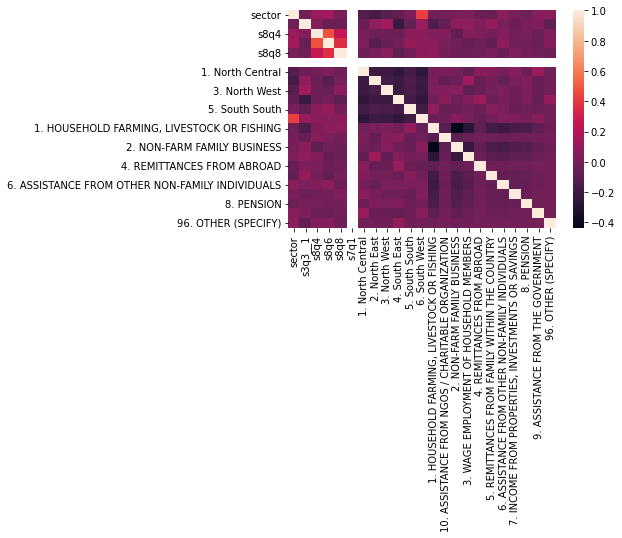

In [ ]:
sns.heatmap(dataset2.corr())

plt.show()

<p>A Correlação entre as variáveis condiz com o que vimos anteriormente pois, a aparência do Mapa de Calor indica que a Correlação entre as regiões, os setores e as fontes de renda não afeta significativamente as respostas das pessoas ao questionário.</p>

<p>Por fim, essa análise mostra que apesar de grande parte das pessoas terem afirmado que passaram ou estão passando por falta de alimento, isso está ocorrendo de forma indiscriminada, ou seja, independente da família ser urbana ou rural, do norte ou do sul, receber ou não benefício do governo, a falta de recursos para um direito básico como a alimentação é geral.</p>

<p>Vale ressaltar que essa análise não tem o objetivo de avaliar a população da Nigéria como um todo, isso engloba apenas as pessoas que foram entrevistadas e mesmo assim não pode ser utilizada como verdade absoluta pois, como é uma pesquisa de opnião sempre há a possibilidade das respostas não refletirem um aspecto real pois, o entrevistado pode mentir, omitir informações ou se sentir compelido a responder aquilo que o entrevistador quer ouvir.</p>